In [1]:
pip install keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import os

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pulse/train_folder',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pulse/test_folder',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 24535 images belonging to 26 classes.
Found 21409 images belonging to 26 classes.


In [5]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(26, activation='softmax'))


In [10]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 6,273,434 (23.93 MB)

 Trainable params: 6,269,338 (23.92 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [11]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [23]:
!rm -rf Logs
logdir = os.path.join("Logs")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(26, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Pulse/train_folder',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Pulse/test_folder',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

from tensorflow.keras.callbacks import EarlyStopping

# Training
batch_size = 32
steps_per_epoch = 20
validation_steps = 5
epochs = 10

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)



Found 25687 images belonging to 26 classes.
Found 4279 images belonging to 26 classes.
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 310s 11s/step - accuracy: 0.1086 - loss: 3.6009 - val_accuracy: 0.0750 - val_loss: 3.6867
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 189s 10s/step - accuracy: 0.3496 - loss: 2.1675 - val_accuracy: 0.0500 - val_loss: 6.7635
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 150s 8s/step - accuracy: 0.4306 - loss: 1.7819 - val_accuracy: 0.0375 - val_loss: 8.1456
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step - accuracy: 0.5016 - loss: 1.6019 - val_accuracy: 0.0125 - val_loss: 7.7310


In [ ]:
%load_ext tensorboard
%tensorboard --logdir Logs

In [41]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Pulse/isl48x48.json",'w') as json_file:
    json_file.write(model_json)
model.save("/content/drive/MyDrive/Pulse/isl48x48.h5")

In [42]:
from IPython.display import display
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from keras.models import model_from_json
from IPython.display import Javascript
import base64
import time

In [43]:
json_file = open("/content/drive/MyDrive/Pulse/isl48x48.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("/content/drive/MyDrive/Pulse/isl48x48.h5")

In [44]:
def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            captureCanvas = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8);
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            document.body.appendChild(div);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = 640;
            video.setAttribute('playsinline', '');
            stream = await navigator.mediaDevices.getUserMedia({video: true});
            div.appendChild(video);

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640;
            captureCanvas.height = 480;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame() {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            stream = await createDom();
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;
            });
            return result;
        }
    ''')
    display(js)

In [45]:
def extract_features(image):
    feature = np.array(image, dtype=np.float32)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


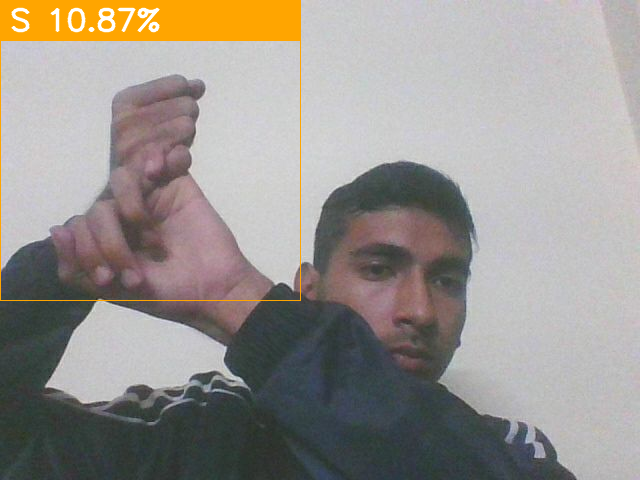

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


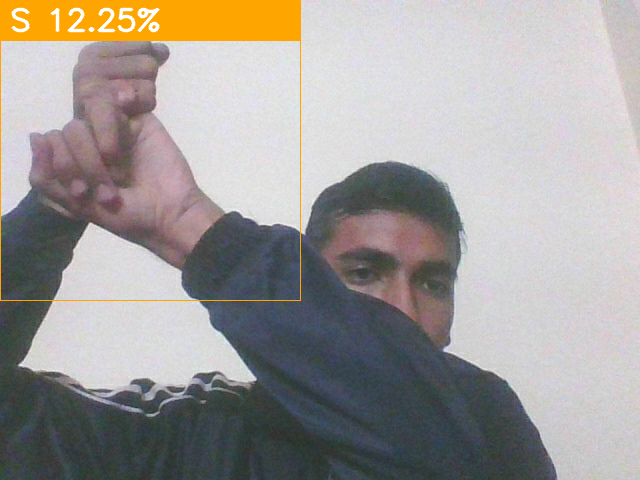

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


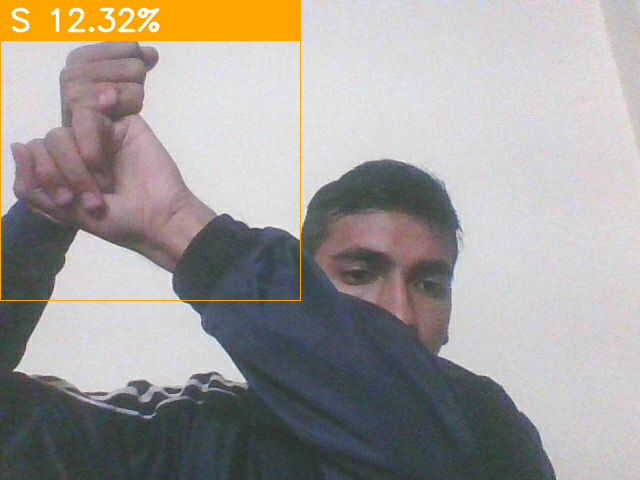

KeyboardInterrupt: 

In [48]:
def run_webcam():
    video_stream()
    label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                       'U', 'V', 'W', 'X', 'Y', 'Z']

    fps_limit = 24
    last_frame_time = 0

    while True:
        current_time = time.time()
        if (current_time - last_frame_time) < (1.0 / fps_limit):
            continue
        last_frame_time = current_time

        frame_data = eval_js('stream_frame();')
        if not frame_data:
            print("Stream ended.")
            break

        frame_array = np.frombuffer(base64.b64decode(frame_data.split(',')[1]), dtype=np.uint8)
        frame = cv2.imdecode(frame_array, cv2.IMREAD_COLOR)

        cv2.rectangle(frame, (0, 40), (300, 300), (0, 165, 255), 1)
        cropframe = frame[40:300, 0:300]
        cropframe = cv2.cvtColor(cropframe, cv2.COLOR_BGR2GRAY)
        cropframe = cv2.resize(cropframe, (48, 48))
        cropframe = extract_features(cropframe)

        pred = model.predict(cropframe)
        prediction_label = label[pred.argmax()]
        accu = "{:.2f}".format(np.max(pred) * 100)

        # Display
        cv2.rectangle(frame, (0, 0), (300, 40), (0, 165, 255), -1)
        if prediction_label == 'blank':
            cv2.putText(frame, " ", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,cv2.LINE_AA)
        else:
            cv2.putText(frame, f'{prediction_label} {accu}%', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

run_webcam()